# Entregável 1 - visão computacional

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.11 


# Equalização de histograma

In [4]:
rintin = cv2.imread("RinTinTin.jpg")

44


In [7]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)
print(rintin_gray[33][44])

44


In [5]:
rintin_gray.shape
print(rintin[33][44][2])

44


44


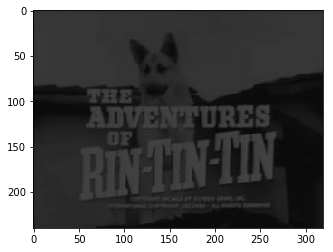

In [6]:
print(rintin[33][44][2])
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

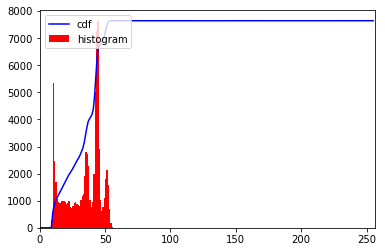

44


In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
print(rintin[33][44][2])

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

1. O histograma não aproveita bem as faixas de cores já que a maioria encontra-se em valores inferiores à 50, tornando a imagem escura.

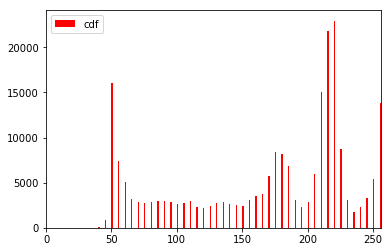

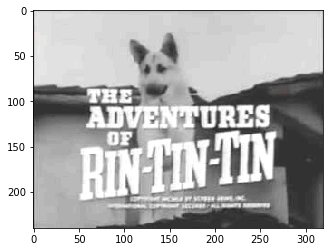

In [8]:
rintin = cv2.imread("RinTinTin.jpg")
sizes= list(rintin.shape)
i=0
while (i<sizes[0]):
    j=0
    while(j<sizes[1]):
        k=0
        while(k<sizes[2]):
            cor= rintin[i][j][k]
            cor**=2
            cor*=25
            cor**=(0.5)
            rintin[i][j][k]=min(255, int(cor))
            k+=1
        j+=1
    i+=1
    
hist,bins = np.histogram(rintin.flatten(),256,[0,256])
plt.hist(rintin.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(rintin, vmin=0, vmax=255)

## O que foi feito?

Iteramos sobre os valores de cor da imagem com a intenção de aumentar a distinção entre a gama de cores disponíveis. Pelo caráter logarítimico da escala RGB, optamos por levar isso em consideração ao expandir os valores disponíveis que eram limitados até um valor RGB próximo à 50. 

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


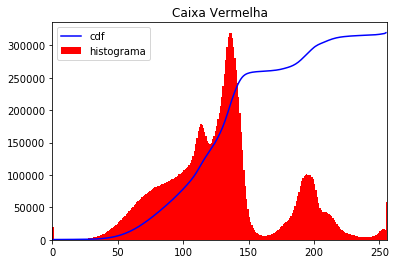

In [62]:
hbb1 = cv2.imread("hall_box_battery1.jpg")
hbb1_rgb = cv2.cvtColor(hbb1, cv2.COLOR_BGR2RGB)
RB = hbb1_rgb[:,:,0]
BB = hbb1_rgb[:,:,2]

hist,bins = np.histogram(RB.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_norm = cdf * hist.max()/ cdf.max()

plt.plot(cdf_norm, color = 'b')
plt.hist(RB.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histograma'), loc = 'upper left')
plt.title('Caixa Vermelha')
plt.show()

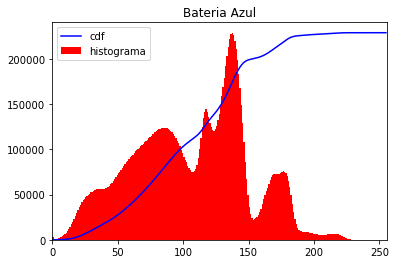

In [64]:
hist,bins = np.histogram(BB.flatten(),256,[0,256])
plt.plot(cdf_norm, color = 'b')
plt.hist(BB.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histograma'), loc = 'upper left')
plt.title('Bateria Azul')
plt.show()

É possivel identificar a caixa e a bateria a partir da análise dos histogramas das cores azul e vermelho. Sabemos que devido ao plano de fundo não ser monocromático os valores de vermelho e azul estão distribuidos ao longo da extensão do espectro. Contudo, esses espectros não são tão intensos quanto o da caixa e da bateria porém são mais frequentes, em geral, na imagem justificando os picos que ocorrem para os valores intermediários dos histogramas.

No histograma da caixa, é possivel localiza-la entre o espectro de 156 a 230.

No segundo histograma, a bateria é localizada entre os espectros de aproximadamente 150 e 185.

752
1504
3008


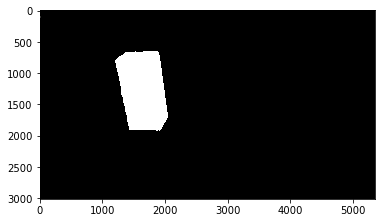

In [31]:
hbb1 = cv2.imread("hall_box_battery1.jpg")
hbb1 = cv2.cvtColor(hbb1, cv2.COLOR_BGR2RGB)
plt.imshow(hbb1, vmin=0, vmax=255)
sizes= list(hbb1.shape)
i=0
j=0
while (i!=sizes[0]):  
    if hbb1[i][j][0] > 156 and hbb1[i][j][1] <= 140 and hbb1[i][j][2] <= 140:
        hbb1[i][j]= [255, 255, 255]
    else:
        hbb1[i][j]= [0, 0, 0]
    j+=1
    i+=j/sizes[1]
    j%=sizes[1]
    
#refinar a detecção  
hbb1 = cv2.cvtColor(hbb1, cv2.COLOR_BGR2GRAY)
hbb1 = cv2.resize(hbb1,(sizes[1]/8+1, sizes[0]/8+1), interpolation = cv2.INTER_NEAREST)
nsizes= list(hbb1.shape)
i=0
j=0

while nsizes[0]<sizes[0]:

    while (i<nsizes[0]):

        if hbb1[i][j]==0 and i!=0 and i!=(nsizes[0]-1) and j!=0 and j!=(nsizes[1]-1):
            #analisar vizinhos
            counter= int(0)
            counter+= int(hbb1[i-1][j])+int(hbb1[i+1][j])+int(hbb1[i][j-1])+int(hbb1[i][j+1])
            counter+= int(hbb1[i-1][j-1])+int(hbb1[i-1][j+1])+int(hbb1[i+1][j-1])+int(hbb1[i+1][j+1])
            counter/=255
            counter/=5
            counter*=255

            hbb1[i][j]= counter
            
        if hbb1[i][j]==255 and i!=0 and i!=(nsizes[0]-1) and j!=0 and j!=(nsizes[1]-1):
            #analisar vizinhos
            counter= int(0)
            counter+= int(hbb1[i-1][j])+int(hbb1[i+1][j])+int(hbb1[i][j-1])+int(hbb1[i][j+1])
            counter+= int(hbb1[i-1][j-1])+int(hbb1[i-1][j+1])+int(hbb1[i+1][j-1])+int(hbb1[i+1][j+1])
            counter/=255
            if counter < 2:
                hbb1[i][j]= 0

        j+=1
        i+=j/nsizes[1]
        j%=nsizes[1]
        
    hbb1 = cv2.resize(hbb1,(nsizes[1]*2, nsizes[0]*2), interpolation = cv2.INTER_NEAREST)
    nsizes= list(hbb1.shape)
    print(nsizes[0])
    
while (i<nsizes[0]):

    if hbb1[i][j]==0 and i!=0 and i!=(nsizes[0]-1) and j!=0 and j!=(nsizes[1]-1):
        #analisar vizinhos
        counter= int(0)
        counter+= int(hbb1[i-1][j])+int(hbb1[i+1][j])+int(hbb1[i][j-1])+int(hbb1[i][j+1])
        counter+= int(hbb1[i-1][j-1])+int(hbb1[i-1][j+1])+int(hbb1[i+1][j-1])+int(hbb1[i+1][j+1])
        counter/=255
        counter/=5
        counter*=255

        hbb1[i][j]= counter
        
    if hbb1[i][j]==255 and i!=0 and i!=(nsizes[0]-1) and j!=0 and j!=(nsizes[1]-1):
            #analisar vizinhos
            counter= int(0)
            counter+= int(hbb1[i-1][j])+int(hbb1[i+1][j])+int(hbb1[i][j-1])+int(hbb1[i][j+1])
            counter+= int(hbb1[i-1][j-1])+int(hbb1[i-1][j+1])+int(hbb1[i+1][j-1])+int(hbb1[i+1][j+1])
            counter/=255
            if counter < 2:
                hbb1[i][j]= 0

    j+=1
    i+=j/nsizes[1]
    j%=nsizes[1]

hbb1 = cv2.resize(hbb1,(sizes[1], sizes[0]), interpolation = cv2.INTER_NEAREST)
plt.imshow(hbb1, cmap="Greys_r", vmin=0, vmax=255)

Código antigo

In [69]:
#hbb1 = cv2.imread("hall_box_battery1.jpg")
#hbb1 = cv2.cvtColor(hbb1, cv2.COLOR_BGR2RGB)
#plt.imshow(hbb1, vmin=0, vmax=255)
#sizes= list(hbb1.shape)
#i=0
#j=0
#while (i!=sizes[0]):  
    #if hbb1[i][j][0] > 156 and hbb1[i][j][1] <= 127 and hbb1[i][j][2] <= 127:
        #hbb1[i][j]= [255, 255, 255]
    #else:
        #hbb1[i][j]= [0, 0, 0]
    #j+=1
    #i+=j/sizes[1]
    #j%=sizes[1]